<a href="https://colab.research.google.com/github/DurgaPrasad-R/FML/blob/main/K_Means_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data
df = pd.read_csv('/content/drive/MyDrive/Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Shape of the data i.e rows and columns
df.shape

(200, 5)

In [6]:
# Check if there are any null
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### We will choose only two attributes that is we consider clustering based on 2 features that will make us better visualize

In [11]:
# Clustering algorithms need Scaling data!! Scale it using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scaled = scale.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])

In [13]:
# Creating new DataFrame
scaled_df = pd.DataFrame(scaled,columns=['Annual Income (k$)','Spending Score (1-100)'])
scaled_df

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [14]:
# importing K-Means Algorithm
from sklearn.cluster import KMeans

In [15]:
alg = KMeans(n_clusters=2)
alg.fit_predict(scaled_df[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [18]:
# To know the centers of the clusters also Centroids
alg.cluster_centers_

array([[0.36929553, 0.31163817],
       [0.37861485, 0.73950929]])

In [20]:
# Labels of clusters and Let's add it to our dataframe
scaled_df['Labels'] = alg.labels_

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

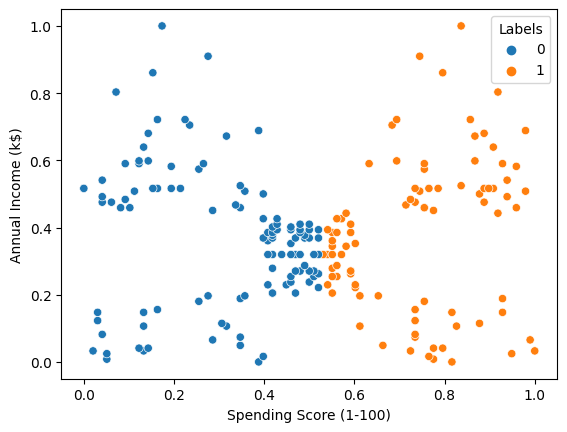

In [23]:
# Visualize the clusters with a scatter plot
sns.scatterplot(x="Spending Score (1-100)", y= "Annual Income (k$)",hue="Labels",data = scaled_df)

#### How do we decide Clusters??
##### The Answer for this is based on Elbow Method with Within-Cluster-Sum of Squared Error (WCSS)

In [27]:
K = range(2,12)
wss = []
for k in K:
  kmeans = KMeans(n_clusters = k)
  kmeans = kmeans.fit(scaled_df)
  wss_iter = kmeans.inertia_
  wss.append(wss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

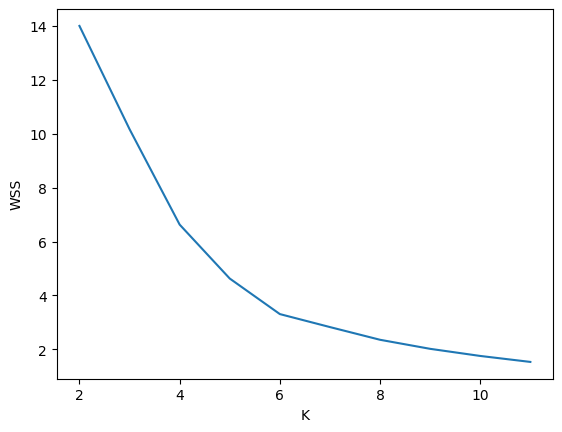

In [28]:
# Let's now Visualize K vs WSS
plt.xlabel('K')
plt.ylabel('WSS')
plt.plot(K,wss)

##### From the Graph above, we could see an elbow bend at K = 5

In [29]:
# Let's do with no_of_clusters as 5
alg1 = KMeans(n_clusters=5)
alg1.fit_predict(scaled_df[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [30]:
alg1.cluster_centers_

array([[0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.33029751, 0.49508692],
       [0.08792846, 0.79962894]])

In [31]:
scaled_df['5_Clusters'] = alg1.labels_

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

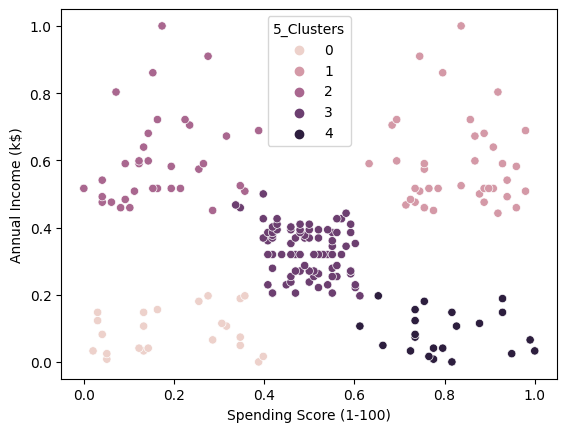

In [33]:
# Let's visualize how the clusters are split using a scatter plot
sns.scatterplot(x="Spending Score (1-100)", y= "Annual Income (k$)",hue="5_Clusters",data = scaled_df)